# Lab 2: Image Processing and Data Reduction

### By: Quentin Morris, Arkadijs Slobodkins, and Daniel Willborn

##### Business Understanding:

This dataset is the Stanford Dogs Dataset. This dataset was initially built using images and annotation from ImageNet for the task of fine-grained image categorization. The prediction task we are attempt with this dataset is to categorize images of dogs by breed. The possible application for this Image classifier would be for usage in Animal Shelters, particularly where the majority of animals are dogs. One usage in a facility such as this would be for classifying newly added animals to the shelter, and keeping a database of new arrivals more organized. This would mean that if a person came into the shelter looking for a lost dog, the shelter could narrow down present dogs by the breed that the person gives them. Additionally, if a person was to come to the shelter looking to adopt a dog and had a particular breed in mind, the shelter could use the classifier for nearly the same purpose here as well. This data and data classification is important as there are many people who own dogs and many who want dogs, and creating a tool to make finding lost dogs or getting unowned dogs out of shelters will help fill an essential need for many. Possible issues that our classifier for this dataset could have is that for best accuracy the images would need to be all the same size, position and have onyl the dog in the image, which the images in this data set do not entirely comply to. Additionally, there could be issues with classifying mixed breeds. For us to consider this classifier successful, it should be able to classify a dog into its "main" breed with at least 80% accuracy.

In [92]:
# code for reading in the Images in the Stanford Dogs Dataset

import pandas as pd
import numpy as np
import time
from PIL import Image
from os import listdir

ds_images = list()

start = time.time()

for filename in listdir("images"):
    
    #read in the image
    img_data = Image.open("images/" + filename)
    
    #resize the image
    img_data = img_data.resize((200,200))
    
    #recolor the image
    img_data = img_data.convert(mode='L')
    
    #convert to numpy array and linearize
    img_data = np.asarray(img_data)
    img_data = img_data.flatten()
    
    #append to list
    ds_images.append(img_data)
    
end = time.time()
elapsed = end - start
    
print("Successfully read in Stanford Dogs Dataset in", elapsed, "seconds")

Successfully read in Stanford Dogs Dataset in 4.767249822616577 seconds


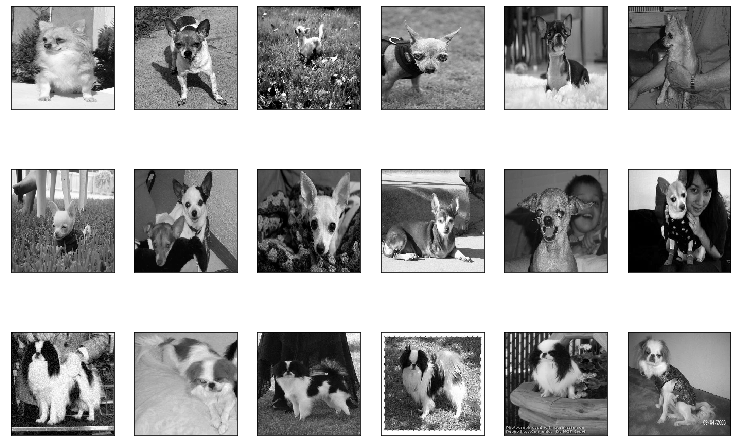

In [93]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

ds_images_array = np.asarray(ds_images)

n_samples, n_features = ds_images_array.shape
h = 200
w = 200

def plot_gallery(images, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_gallery(ds_images_array, h, w) # defaults to showing a 3 by 6 subset of the faces

In [94]:
#the pca code block is from the class lecture jupyter notebook on dimensionality reduction
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb

n_components = 1100
#print ("Extracting the top %d PCA Eigen-images from %d images" % (
    #n_components, ds_images_array.shape[0]))

#pca = PCA(n_components=n_components)
#%time pca.fit(ds_images_array.copy())
pups_pca = PCA(n_components = n_components)
X_pca = ds_images_array.copy()
pups_pca.fit(X_pca)
pups_pca.transform(X_pca)
#eigenfaces = pca.components_.reshape((n_components, h, w))

array([[ 6.30921359e+03,  7.36991752e+03, -3.02183282e+03, ...,
        -2.29503678e+00,  8.24631052e+01, -3.08130985e+01],
       [ 1.80208675e+03,  2.32424650e+03,  1.85870371e+03, ...,
        -6.53336269e+00,  5.35614404e+01, -3.59322290e+01],
       [-2.11692929e+03, -2.90472632e+03, -3.27596267e+03, ...,
         4.29867653e+00, -4.12158852e+01, -3.75033587e+01],
       ...,
       [-5.38049779e+03,  2.93591175e+02,  1.05990009e+02, ...,
         2.16130787e+01, -2.01351807e-01, -9.05018905e+01],
       [ 4.67797234e+03,  2.48134762e+03,  6.76353239e+02, ...,
         2.67071127e+01,  2.31825021e+01,  6.04191905e+01],
       [ 1.88152423e+03,  8.15521146e+02,  5.34802440e+02, ...,
        -6.63193890e+01,  8.40189225e+01, -1.62938888e+01]])

In [95]:
#the pca explained variance code block is from the class lecture jupyter notebook on dimensionality reduction
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb

explained_variance = pups_pca.explained_variance_ratio_.cumsum()
size = len(explained_variance)
for i in range (0,size):
    if explained_variance[i] > 0.9:
        print('Number of components needed for 90% reconstruction:',i)
        print(explained_variance[i])        
        break

Number of components needed for 90% reconstruction: 324
0.9000631160151237


Number of components needed for 80% reconstruction: 104
Number of components needed for 90% reconstruction: 324


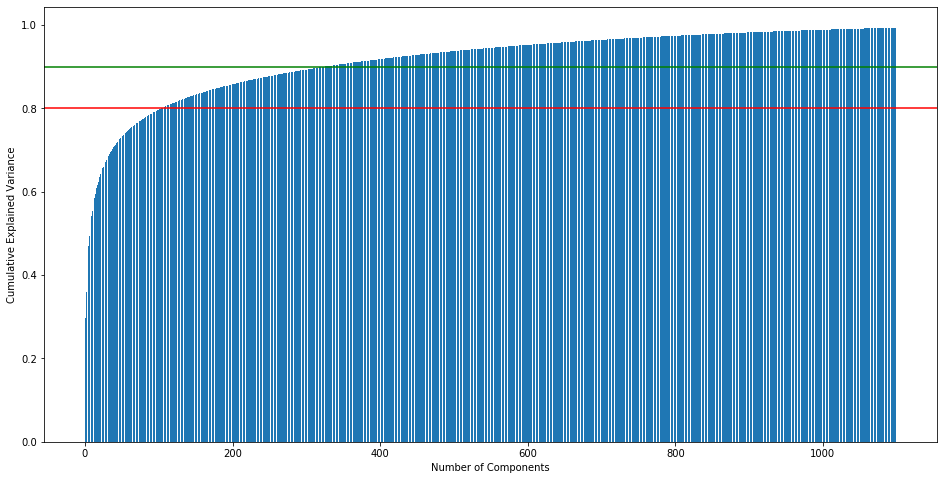

In [96]:
import matplotlib
import matplotlib.pyplot as plt
import warnings

plt.rcParams["figure.figsize"] = [16,8]
x_vals = range(0,1100)
plt.bar(x_vals,explained_variance)
plt.axhline(y=0.8, color='r', linestyle='-')
plt.axhline(y=0.9, color='g', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

for i in range (0,size):
    if explained_variance[i] >= 0.8:
        print('Number of components needed for 80% reconstruction:',i)
        break
        
for i in range (0,size):
    if explained_variance[i] >= 0.90:
        print('Number of components needed for 90% reconstruction:',i)
        break
#print(explained_variance[1])

##### Data Reduction - Linear Dimensionality Reduction(PCA)

In the visualization of cumulative explained variance, a knee can be seen from about 100-300 components. In order to hone in on exactly where this knee occurs, we search for the index where the cumulative explained variance reaches 80% and 90%. Visually the knee happens around 100-300 components, but quantitatively we found that at 104 components the cumulative explained variance reaches 80% and begins forming a knee. While at 104 components (of 1100) about 80% of an image can be recovered, it only takes another 220 components (324 total components) to recover 90% of an image. The red line on the plot visualizes 80% of cumulative explained variance and the green line shows 90% of cumulative explained variance. This visual highlights how few principal components are needed to reach 80% and 90% explained variance (about 10% and 30% of total, respectively). From this information a valid conclusion may be that for the sake of future computation, as few as 104 components can be used to recover images but using 324 will ensure we recover 90% of the explained variance.

In [97]:
#the kpca code block is from the class lecture jupyter notebook on dimensionality reduction
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb

from sklearn.decomposition import KernelPCA

n_components=1100
kpca= KernelPCA(n_components=n_components, kernel='rbf', 
     fit_inverse_transform=True, gamma=.01, remove_zero_eig=True)

kpca.fit(ds_images_array)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=True, gamma=0.01, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=1100, n_jobs=None,
          random_state=None, remove_zero_eig=True, tol=0)

Number of components needed for 80% reconstruction: 879
Number of components needed for 90% reconstruction: 989


Text(0, 0.5, 'Cumulative Explained Variance')

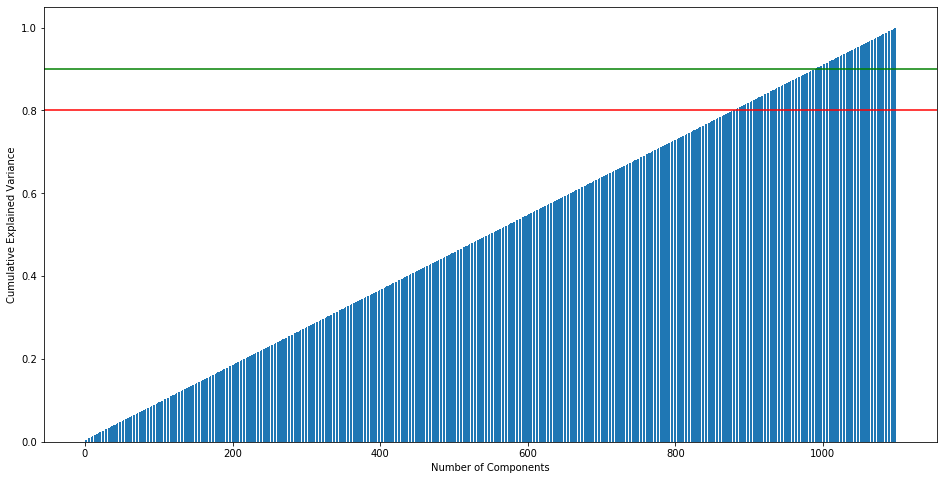

In [98]:
#the kpca explained variance code was taken from the following site:
#https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance

explained_variance = np.var(kpca.X_transformed_fit_, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
#print(np.cumsum(explained_variance_ratio))
kpca_cum_ev = np.cumsum(explained_variance_ratio)

size2 = len(kpca_cum_ev)

for i in range (0,size2):
    if kpca_cum_ev[i] >= 0.8:
        print('Number of components needed for 80% reconstruction:',i)
        break
        
for i in range (0,size2):
    if kpca_cum_ev[i] >= 0.90:
        print('Number of components needed for 90% reconstruction:',i)
        break

plt.rcParams["figure.figsize"] = [16,8]
x_vals = range(0,1100)
plt.bar(x_vals,kpca_cum_ev)
plt.axhline(y=0.8, color='r', linestyle='-')
plt.axhline(y=0.9, color='g', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

##### Data Reduction - Comparing linear vs nonlinear dimensionality reduction (PCA vs kPCA)

When comparing linear to nonlinear dimensionality reduction, one way to analyze which method would be more efficient for representing images with fewer components would be to compare how many components it takes to reach 80% and 90% explained variance in images using both methods with the same amount of dimensions. Above when looking at dimensionality reduction using PCA, it took 104 of 1100 components to represent 80% of variance in an image and 1058 components to represent 90%. Comparing this to kPCA makes it clear that PCA is the dimensionality reduction method we want to use to reduce dimensions of our data set. Using kPCA it takes 879 components to represent 80% of the variance in an image and 989 components to represent 90% of the variance in an image. PCA represents much more variance in the data with fewer features making it appear to be the better method for dimensionality reduction. The graph above illustrates that explained variance grows at a much slower, more linear rate for kPCA in comparison to the logrithmic growth in explained variance seen in the PCA plot.

In [99]:
#the daisy code blocks are from the class lecture jupyter notebook on dimensionality reduction
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb

from skimage.io import imshow
from skimage.feature import daisy

In [100]:
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=40, radius=10, rings=3, histograms=5, orientations=8, visualize=False)
    return feat.reshape((-1))
%time daisy_features = np.apply_along_axis(apply_daisy, 1, ds_images, (h,w))
print(daisy_features.shape)

Wall time: 1min 45s
(1292, 3200)


In [101]:
from sklearn.metrics.pairwise import pairwise_distances

%time dist_matrix = pairwise_distances(daisy_features)

Wall time: 95.7 ms


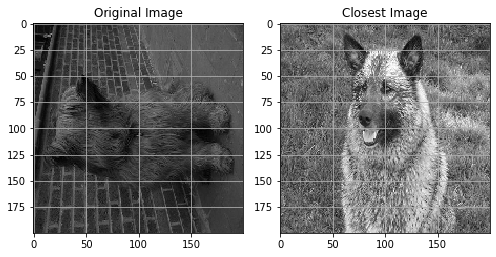

In [102]:
import copy
# find closest image to current image
idx1 = int(np.random.rand(1)*len(ds_images))
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(ds_images[idx1].reshape((h,w)))
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
imshow(ds_images[idx2].reshape((h,w)))
plt.title("Closest Image")
plt.grid()

{'whiskers': [<matplotlib.lines.Line2D at 0x23eaec96f48>,
 'caps': [<matplotlib.lines.Line2D at 0x23eaec7b788>,
 'boxes': [<matplotlib.lines.Line2D at 0x23eaec96ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x23eaec90388>],
 'fliers': [<matplotlib.lines.Line2D at 0x23eaec87108>],
 'means': []}

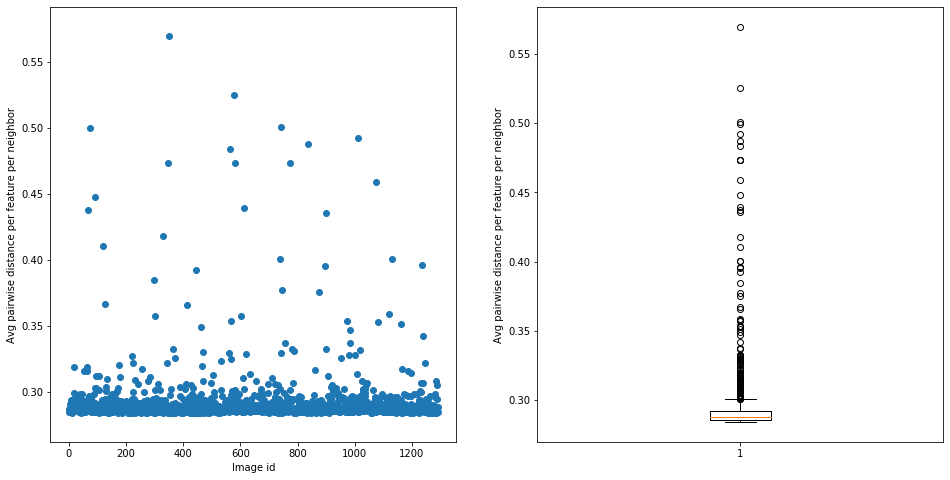

In [103]:
def nearest_neighbors(num_neighbors):
    averages = []
    for i in range(0,len(ds_images)):
        temp = [None]*num_neighbors
        sum = 0
        distances = copy.deepcopy(dist_matrix[i,:]) 
        distances[i] = np.infty
        for k in range(0,num_neighbors):
            temp[k] = np.argmin(distances)
            sum = sum + np.mean(dist_matrix[temp[k]])
            distances[temp[k]] = np.infty
        avg = sum/num_neighbors
        averages.append(avg)
    return averages
        
avg_per_img = nearest_neighbors(5)

plt.rcParams["figure.figsize"] = [16,8]

plt.subplot(1,2,1)
plt.ylabel("Avg pairwise distance per feature per neighbor")
plt.xlabel("Image id")
plt.scatter(range(0,len(avg_per_img)),avg_per_img)

plt.subplot(1,2,2)
plt.ylabel("Avg pairwise distance per feature per neighbor")
plt.boxplot(avg_per_img)

##### DAISY usage and effectiveness

To get these graphs, we used the the pairwise distance matrix to find the K nearest neighbors in the dataset, then found the average of the distance for each image and then find the average of all the images for the selected image. We figured this to be an effective method for quantifying the "similarity" between a selected images and its nearest neighbors. By then looking at the resulting scatterplot and boxplot, we find that there are quite a few images with a comparably high average difference, but 90% of the data falls between 0.28 and 0.31, meaning that the daisy feature extractor is fairly consistent, and should work for our purposes. Factors that can cause images to be considered similar ir different when they aren't can be the dog's posture, how much of the image the dog takes up, or whether there are other objects/animals/people in the image. An ideal data set would have portrait style photos similar to the "lfw_people" dataset used in class.

##### References:

https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb
https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance